In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import re 
%matplotlib inline

In [3]:
document_pattern = r'<document>(.*?)</document>'
label_pattern = r'<label>(.*?)</label>'
content_pattern = r'<content>(.*?)</content>'

In [4]:
def read_all_file(filename):
    with open(filename, "r") as f:
        raw_data = f.read().replace("\n", " ")
    return raw_data

In [5]:
filename = 'traindatatopic.txt'
raw_data = read_all_file(filename)

In [7]:
# Extract data between <document> tags
document_raw_data = re.findall(document_pattern, raw_data, flags=0)

In [8]:
document_raw_data[0]

' <label>sentiment</label> <content>Cá tính mà rất đáng yêu nè See Translation</content> '

In [55]:
# Extract labels and contents from document_raw_data
labels = []
contents = []
for i in range(len(document_raw_data)):
    label = re.findall(label_pattern, document_raw_data[i], flags=0)
    if (label != [] and label[0] == 'oreign language'):
        labels.append('foreign language')
    elif (label == []):
        labels.append("other topics")
    else: labels.append(label[0])
    content = re.findall(content_pattern, document_raw_data[i], flags=0)
    if (content != []):
        contents.append(content[0])
    else: contents.append("None content")
    

In [57]:
# Save extracted data into csv format
import csv
with open('extracted_data.csv', 'w', encoding='utf-8-sig') as f:
    writer = csv.writer(f)
    writer.writerows(zip(labels, contents))

In [32]:
import collections

In [58]:
labelList = collections.Counter(labels)

In [59]:
labelList

Counter({'sentiment': 2551,
         'other topics': 394,
         'advertisement': 1337,
         'purchase': 309,
         'foreign language': 185,
         'recruit': 189})

In [60]:
l = range(len(labelList.keys()))

([<matplotlib.axis.XTick at 0x7f8a901e04e0>,
 <a list of 6 Text xticklabel objects>)

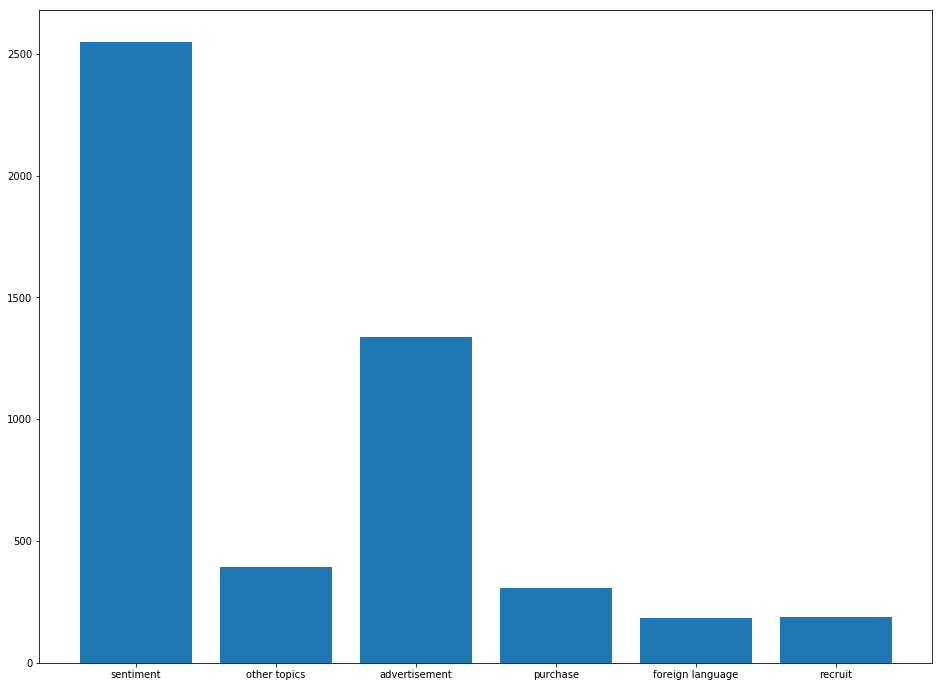

In [61]:
plt.figure(figsize=(16,12))
plt.bar(l, labelList.values(), align='center')
plt.xticks(l, labelList.keys())

## Deal with imbalance data

## Firstly, we need some steps to clean data

In [62]:
# split data into training, validatiing and testing data
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(contents, labels, test_size=0.2, random_state=42)

## Words Segmentation

In [66]:
from pyvi import ViTokenizer

In [67]:
class Segmentation(object):
    def __init__(self, text = None):
        self.text = text
        self.__set_stopwords()
    
    def segmentation(self):
        return ViTokenizer.tokenize(self.text )

In [68]:
temp = u"Ảnh Đinh Hương chụp khi tổng duyệt Thebox Idol hôm nay nè nghen ^^ Hóng ảnh và clip Đinh Hương nhận giải CA SỸ CỦA NĂM Nghe nói là nàng đẹp lộng lẫy luôn :))) Hôm nay cô nàng cũng tham gia trình diễn với ca khúc SO I đóa  *hóng hóng hóng* See Translation"

In [79]:
from utils import *

In [81]:
NLP(text=temp).segmentation()

AttributeError: module 'pyvi.ViTokenizer' has no attribute 'tokenizer'